In [1]:
from random import randint

import networkx as nx
import pandas as pd
import torch
from matplotlib import pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as nng
import numpy as np

import random

from Dimploma.util import show_data, generate_random_graph_2


In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
edge_amount = 25
node_amount = 10
edge_value_min = 1
edge_value_max = 10

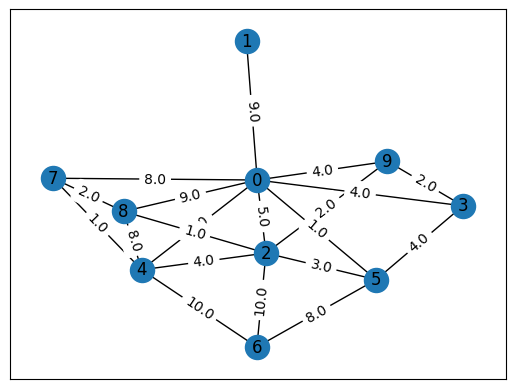

In [48]:


x = torch.arange(node_amount)
parent = torch.arange(node_amount)
edge_index = torch.zeros((edge_amount, 2))
edges_attr = torch.zeros((edge_amount, 2))
edges_weight = torch.zeros(edge_amount)
e = 0

# make a basic tree
while not torch.all(parent == parent[0]):
    mask = parent == parent[0]

    from_nodes = x[mask]
    to_nodes = x[~mask]
    
    random_from = from_nodes[random.randint(0, from_nodes.shape[0] - 1)]
    random_to = to_nodes[random.randint(0, to_nodes.shape[0] - 1)]
    
    edge_index[e] = torch.tensor([random_from, random_to])
    edges_weight[e] = randint(edge_value_min, edge_value_max)
    edges_attr[e, 0] = edges_weight[e]
    edges_attr[e, 1] = 0
    e += 1
    parent[random_to] = parent[random_from]

# fill out the rest with random picks
while e < edge_amount:
    
    node_from = random.randint(0, node_amount - 1)
    
    possibilities = torch.arange(node_amount)
    
    # filter out self loops
    possibilities = possibilities[possibilities != node_from]
    
    # filter out already existing edges
    banned_nodes1 = edge_index[edge_index[:, 0] == node_from, 1]
    banned_nodes2 = edge_index[edge_index[:, 1] == node_from, 0] 
    mask = torch.logical_not(torch.any(possibilities.unsqueeze(1) == torch.unique(torch.cat((banned_nodes1, banned_nodes2))), dim=1))
    
    possibilities = possibilities[mask]
    
    if possibilities.shape[0] > 0:
        # pick one and create edge
        node_to = random.randint(0, possibilities.shape[0] - 1)
        edge_index[e] = torch.tensor([node_from, possibilities[node_to]])
        edges_weight[e] = randint(edge_value_min, edge_value_max)
        edges_attr[e, 0] = edges_weight[e]
        edges_attr[e, 1] = 0
        
        e += 1

graph = Data(x=x, edge_index=edge_index.T, edge_attr=edges_attr, edge_weight=edges_weight)
show_data(graph)

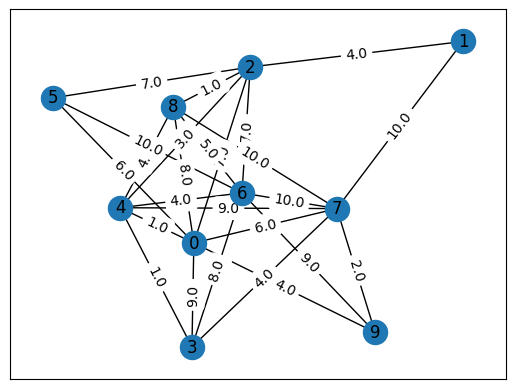

In [13]:
show_data(generate_random_graph_2(node_amount, edge_amount, edge_value_min, edge_value_max))